# Normalized Attention Guidance

paper: https://arxiv.org/abs/2505.21179

project page: https://chendaryen.github.io/NAG.github.io/

Hugging Face Demo: https://huggingface.co/spaces/ChenDY/NAG_FLUX.1-schnell and https://huggingface.co/spaces/ChenDY/NAG_FLUX.1-dev

In [1]:
!pip install -r requirements.txt

In [2]:
import torch
from PIL import Image

from src.pipeline_flux_nag import NAGFluxPipeline
from src.transformer_flux import NAGFluxTransformer2DModel

In [3]:
# load pipeline

transformer = NAGFluxTransformer2DModel.from_pretrained(
    "black-forest-labs/FLUX.1-schnell",
    subfolder="transformer",
    torch_dtype=torch.bfloat16,
)
pipe = NAGFluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-schnell",
    transformer=transformer,
    torch_dtype=torch.bfloat16,
)

device="cuda"
pipe = pipe.to(device)

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


## Sampling with NAG

In [4]:
prompt = "Portrait of AI researcher"
nag_negative_prompt = "Glasses"
nag_negative_prompt_2 = "Male"
num_inference_steps = 4
nag_scale = 3.0
nag_scale_2 = 7.0
seed = 2047

In [5]:
# sampling

image_baseline = pipe(
    prompt,
    guidance_scale=0.,
    generator=torch.Generator(device="cuda").manual_seed(seed),
    num_inference_steps=num_inference_steps,
    max_sequence_length=256,
).images[0]

image_nag = pipe(
    prompt,
    guidance_scale=0.,
    nag_negative_prompt=nag_negative_prompt,
    nag_scale=nag_scale,
    generator=torch.Generator(device="cuda").manual_seed(seed),
    num_inference_steps=num_inference_steps,
    max_sequence_length=256,
).images[0]

image_nag_2 = pipe(
    prompt,
    guidance_scale=0.,
    nag_negative_prompt=nag_negative_prompt_2,
    nag_scale=nag_scale_2,
    generator=torch.Generator(device="cuda").manual_seed(seed),
    num_inference_steps=num_inference_steps,
    max_sequence_length=256,
).images[0]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

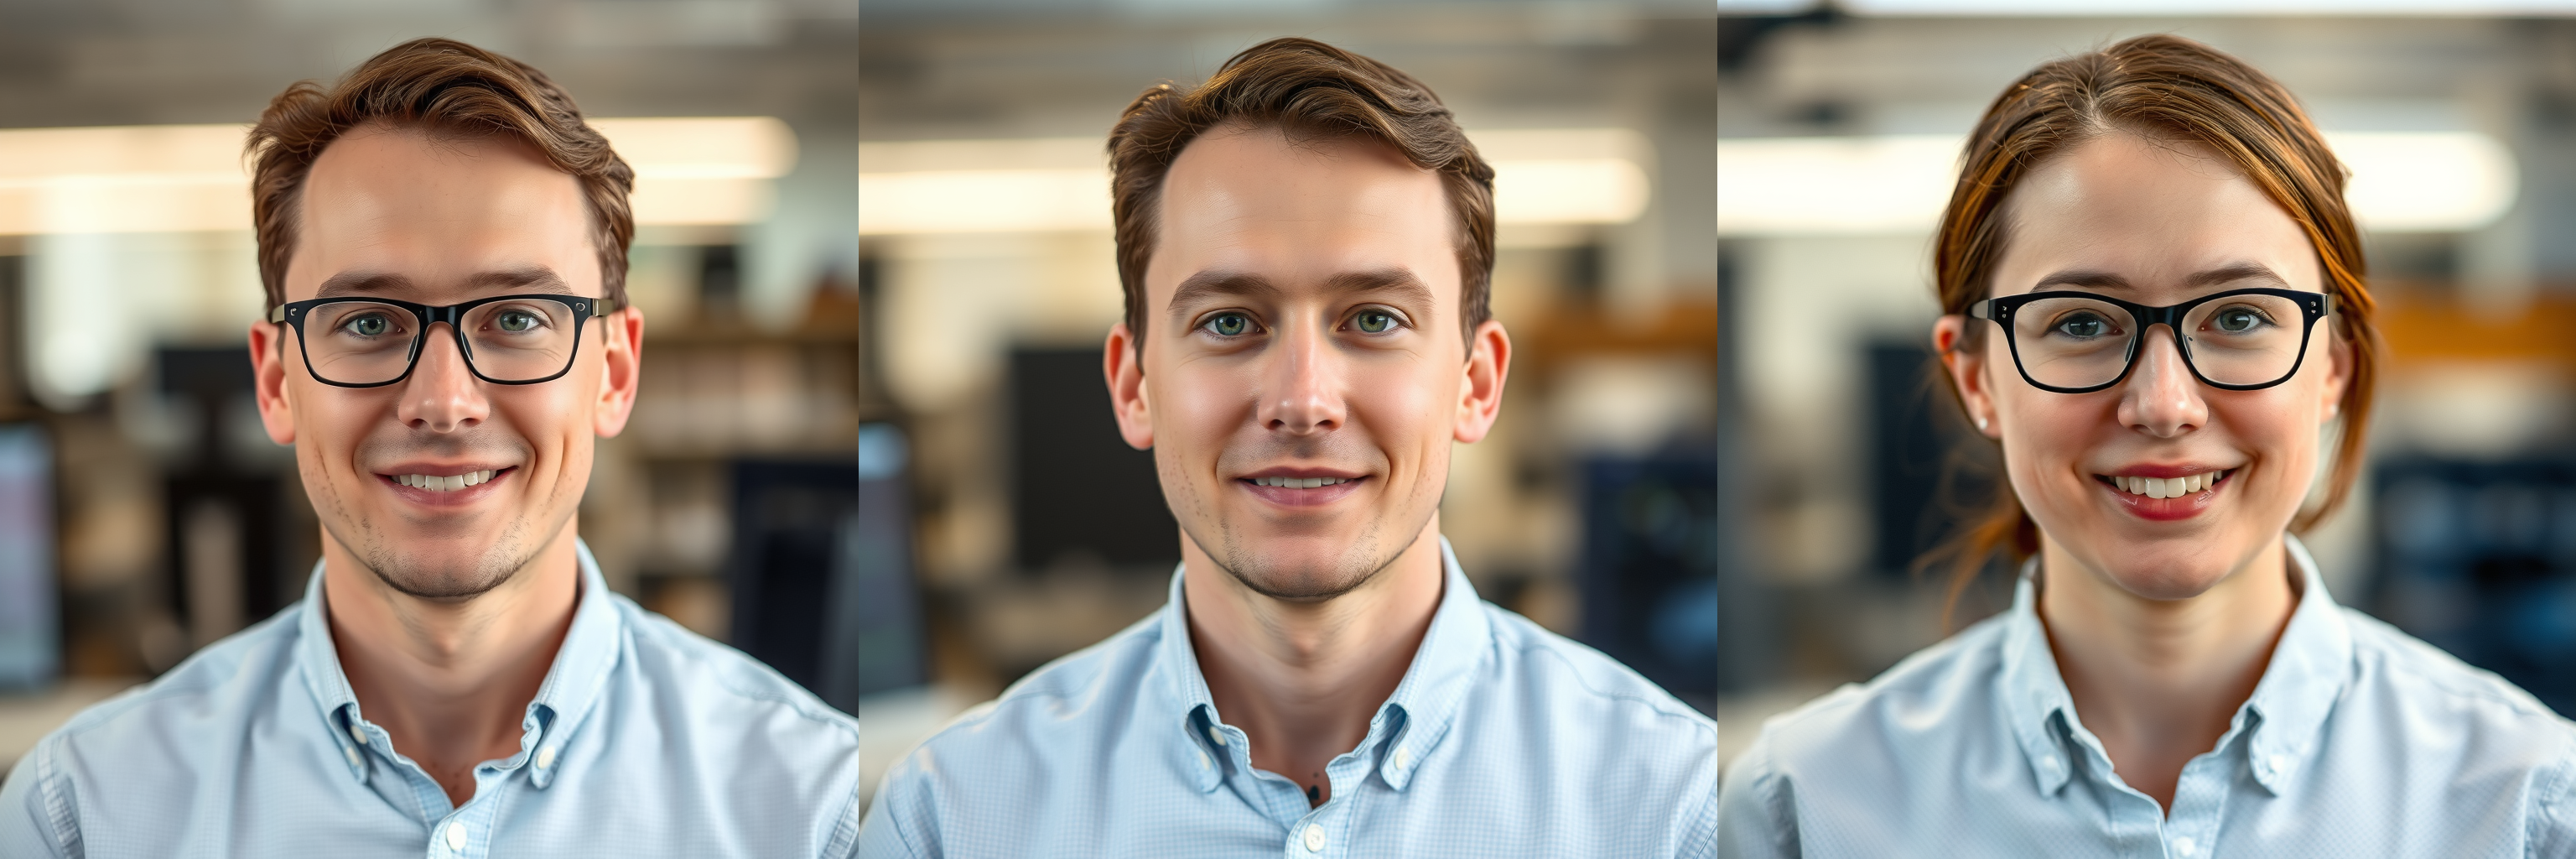

In [6]:
image_compare = Image.new('RGB', (3072, 1024))
image_compare.paste(image_baseline, (0, 0))
image_compare.paste(image_nag, (1024, 0))
image_compare.paste(image_nag_2, (2048, 0))
image_compare

In [7]:
prompt = "A baby phoenix made of fire and flames is born from the smoking ashes."
nag_negative_prompt = "Low resolution, blurry."
num_inference_steps = 4
nag_scale = 5.0
seed = 2107

In [8]:
# sampling

image_baseline = pipe(
    prompt,
    guidance_scale=0.,
    generator=torch.Generator(device="cuda").manual_seed(seed),
    num_inference_steps=num_inference_steps,
    max_sequence_length=256,
).images[0]

image_nag = pipe(
    prompt,
    guidance_scale=0.,
    nag_negative_prompt=nag_negative_prompt,
    nag_scale=nag_scale,
    generator=torch.Generator(device="cuda").manual_seed(seed),
    num_inference_steps=num_inference_steps,
    max_sequence_length=256,
).images[0]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

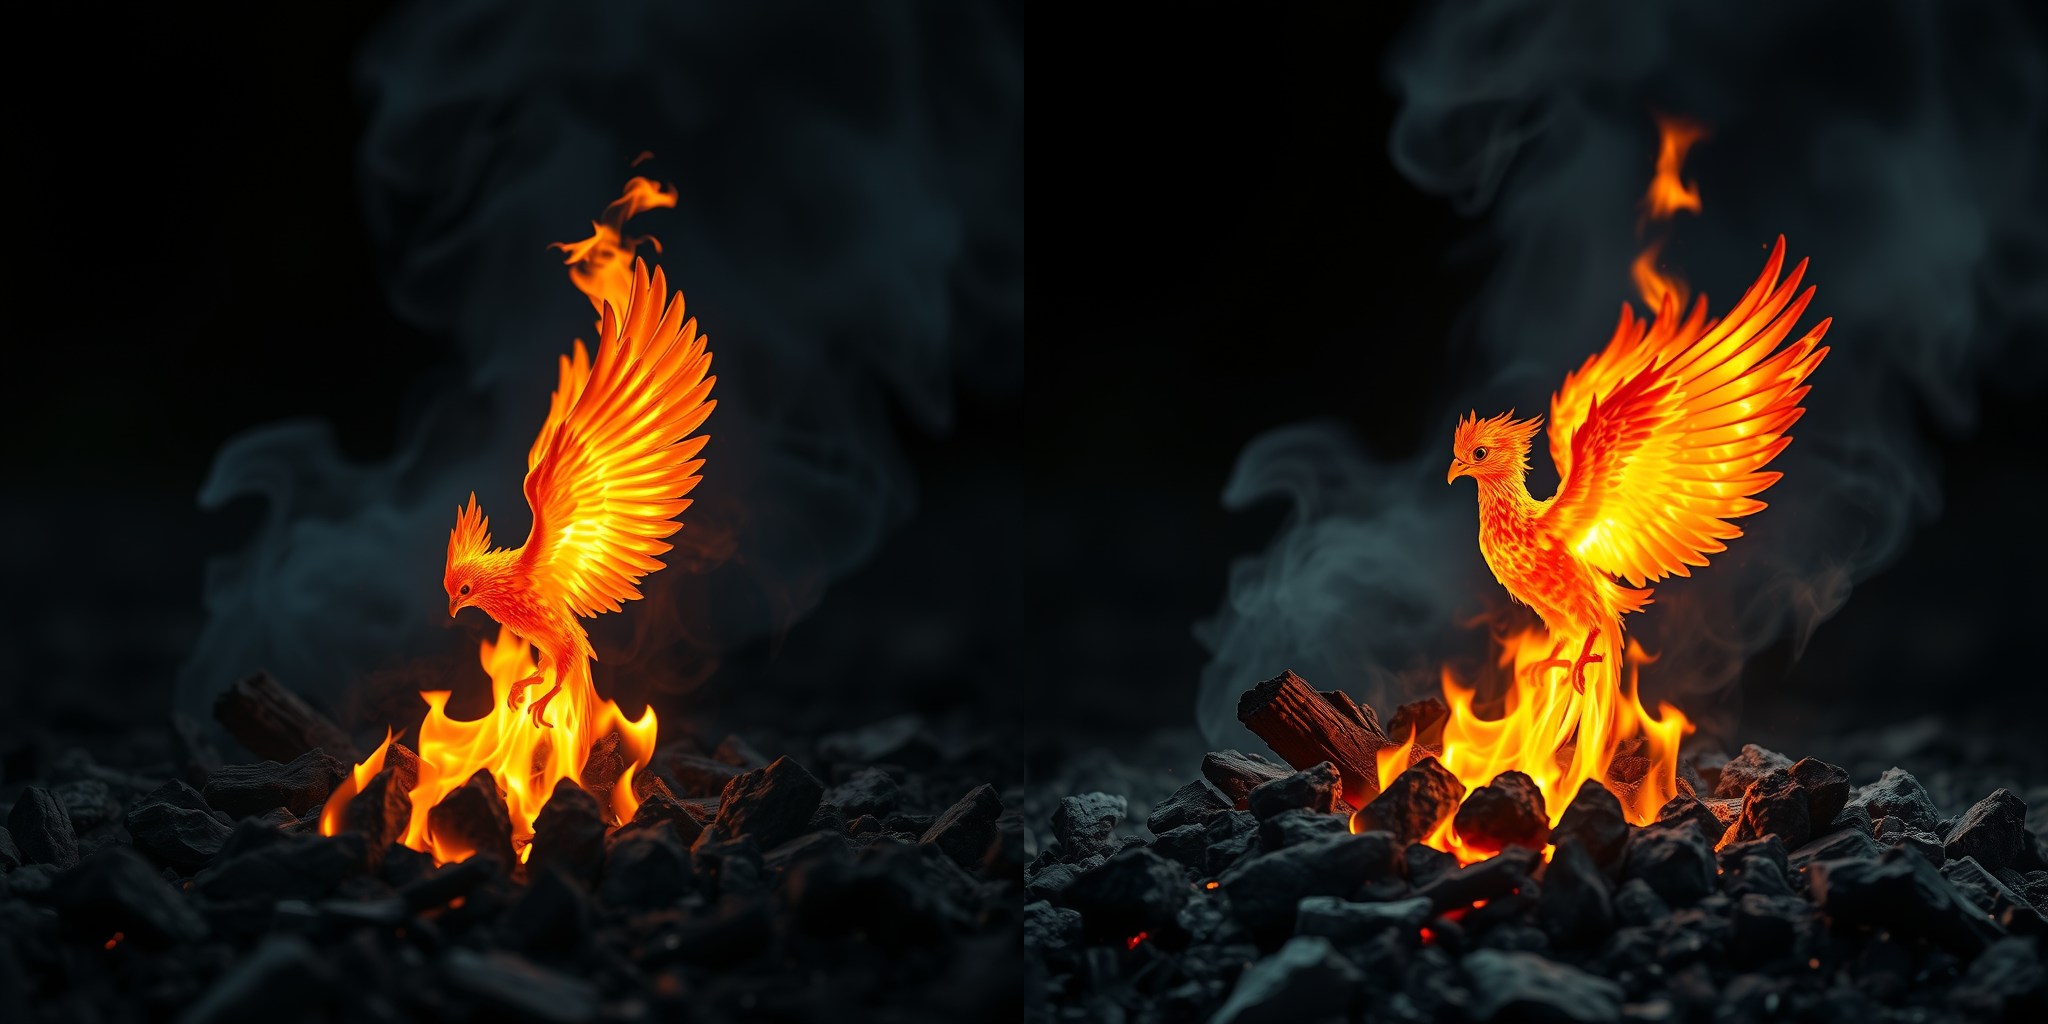

In [9]:
image_compare = Image.new('RGB', (2048, 1024))
image_compare.paste(image_baseline, (0, 0))
image_compare.paste(image_nag, (1024, 0))
image_compare